# IMPORT

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
erp = pd.read_excel('erp.xlsx')
liaison = pd.read_excel('liaison.xlsx')
web = pd.read_excel('web.xlsx')
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np
from scipy.stats import zscore

# DISPLAY **

In [2]:
display(erp)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [3]:
display(liaison)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [4]:
display(web)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


# DESCRIBE ET INFO **

## ERP

In [5]:
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [6]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


## LIAISON

In [7]:
liaison.describe(include='all')

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [8]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


## WEB

In [9]:
web.describe(include='all', datetime_is_numeric=True)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,716,NaN,NaN,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,...,bon-cadeau-de-25-euros,NaN,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,1,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,2018-08-22 03:22:17.090908928,...,NaN,2020-06-20 13:59:29.781818368,2020-06-20 12:06:02.509090816,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,2018-02-27 20:01:12.500000,...,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,2018-04-19 14:56:05,...,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,2019-01-31 14:35:47,...,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,NaN,2.000000,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [10]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

# SHAPE ET DUPLICATED **

## SHAPE

In [11]:
erp.shape


(825, 5)

In [12]:
liaison.shape

(825, 2)

In [13]:
web.shape

(1513, 28)

## DUPLICATED

In [14]:
erp.duplicated().count()

825

In [15]:
liaison.duplicated().count()

825

In [16]:
web.duplicated().count()

1513

## NUNIQUE

In [17]:
erp.nunique()

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64

In [18]:
liaison.nunique()

product_id    825
id_web        734
dtype: int64

In [19]:
web.nunique()

sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [20]:
### PRIMARY KEY: sku (web) - id_web (liaison)

# FILLNA **

In [21]:
liaison['product_id'].isnull().sum()

0

In [22]:
liaison['id_web'].isnull().sum()

91

In [23]:
liaison.dropna(inplace=True)

In [24]:
len(liaison['product_id'].unique())

734

In [25]:
len(liaison['id_web'].unique())

734

In [26]:
len(erp['product_id'].unique())

825

In [27]:
erp.count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64

In [28]:
web.rename(columns={'sku': 'id_web'}, inplace=True)

In [29]:
columns=web.columns.tolist()

In [30]:
columns=['id_web',
 #'virtual',
 #'downloadable',
 #'rating_count',
 #'average_rating',
 'total_sales',
 'tax_status',
 #'tax_class',
 #'post_author',
 #'post_date',
 'post_date_gmt',
 #'post_content',
 'post_title',
 'post_excerpt',
 ##'post_status',
 ##'comment_status',
 ##'ping_status',
 #'post_password',
 'post_name',
 #'post_modified',
 'post_modified_gmt',
 #'post_content_filtered',
 #'post_parent',
 'guid',
 #'menu_order',
 'post_type',
 'post_mime_type',
 #'comment_count'
        ]

In [31]:
web=web[columns]

In [32]:
web=web.groupby(['id_web','tax_status','post_date_gmt','post_excerpt','post_title'], dropna=True).mean()

In [33]:
web=web.reset_index()

In [34]:
web['tax_status'].dropna(inplace=True)

# MERGE **

In [35]:
el= pd.merge(erp, liaison , on='product_id', how='left')

In [36]:
display(el)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [37]:
el.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
count,825.000000,825.000000,825.000000,825.000000,825,734.0
unique,NaN,NaN,NaN,NaN,2,734.0
top,NaN,NaN,NaN,NaN,instock,15298.0
freq,NaN,NaN,NaN,NaN,638,1.0
mean,5162.597576,0.869091,32.415636,26.496970,NaN,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN,NaN


In [38]:
el[el['stock_status']=='outofstock'].count()

product_id        187
onsale_web        187
price             187
stock_quantity    187
stock_status      187
id_web            158
dtype: int64

In [39]:
el[el['stock_status']=='instock'].count()

product_id        638
onsale_web        638
price             638
stock_quantity    638
stock_status      638
id_web            576
dtype: int64

In [40]:
elw = pd.merge(el, web, how='right', on='id_web')

In [41]:
elw.describe(include='all', datetime_is_numeric=True)

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales
count,714.000000,714.0,714.000000,714.000000,714,714.0,714,714,714,714,714.000000
unique,NaN,NaN,NaN,NaN,2,714.0,1,NaN,677,711,NaN
top,NaN,NaN,NaN,NaN,instock,38.0,taxable,NaN,Les eaux de vie naissent d'une subtile alchimi...,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,NaN
freq,NaN,NaN,NaN,NaN,574,1.0,714,NaN,12,2,NaN
mean,5032.557423,1.0,32.493137,28.746499,NaN,NaN,NaN,2018-08-22 02:29:08.581232640,NaN,NaN,4.012605
min,3847.000000,1.0,5.200000,0.000000,NaN,NaN,NaN,2018-02-08 11:58:52,NaN,NaN,0.000000
25%,4280.250000,1.0,14.100000,2.000000,NaN,NaN,NaN,2018-02-27 19:01:12.500000,NaN,NaN,0.000000
50%,4796.000000,1.0,23.550000,12.000000,NaN,NaN,NaN,2018-04-19 12:52:10,NaN,NaN,1.000000
75%,5710.500000,1.0,42.175000,35.000000,NaN,NaN,NaN,2019-01-31 13:35:47,NaN,NaN,4.000000
max,7338.000000,1.0,225.000000,578.000000,NaN,NaN,NaN,2020-07-20 09:00:00,NaN,NaN,96.000000


In [42]:
elw['product_id'].dropna(inplace=True)

In [43]:
print ( len(elw['id_web'].unique())
,
len(elw['product_id'].unique())
      )

714 714


# ANALYSE DE DONNEES **

## 714 PRODUITS **

In [44]:
elw.groupby(['id_web']  ).mean()

,product_id,onsale_web,price,stock_quantity,total_sales
id_web,,,,,
38,4729.0,1.0,8.6,151.0,38.0
41,4634.0,1.0,41.0,4.0,0.0
304,4141.0,1.0,39.0,1.0,40.0
523,5932.0,1.0,59.9,3.0,0.0
531,5047.0,1.0,22.5,129.0,13.0
...,...,...,...,...,...
19820,5561.0,1.0,58.0,0.0,0.0
19821,5563.0,1.0,58.0,0.0,0.0
19822,5565.0,1.0,92.0,0.0,0.0


## SALES=0 ET STOCK>0 = 256

In [45]:
elw[ (elw['total_sales']==0.0) & (elw['stock_quantity']>0)    ].sort_values('price')

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales
195,6129,1,5.2,30,instock,14570,taxable,2019-06-28 16:01:06,Nez Séduisant et puissant. Bouquet de fleurs j...,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,0.0
176,5777,1,5.7,132,instock,14338,taxable,2019-03-15 09:13:30,"<span style=""float: none; background-color: tr...",Maurel Pays d'Oc Cabernet-Sauvignon 2017,0.0
673,4198,1,5.8,105,instock,16322,taxable,2018-02-15 12:51:32,Belle complexité aromatique alliant fruits rou...,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,0.0
610,4755,1,7.4,97,instock,16132,taxable,2018-04-18 19:55:53,"C'est un vin de soif, léger et épicé. Le Groll...",Domaine de Montgilet Vin de France Grolleau 2019,0.0
177,4739,1,7.4,50,instock,14366,taxable,2018-04-18 19:00:55,"Dans sa robe pourpre, signe d'une jeunesse fri...",Jean-Paul Brun Beaujolais Le Ronsay 2016,0.0
...,...,...,...,...,...,...,...,...,...,...,...
225,5917,1,122.0,4,instock,14775,taxable,2019-04-04 14:49:37,"710 bouteilles, 17 ans d'âge.\n\n<span title=""...",Wemyss Malts Single Cask Scotch Whisky Choc 'n...,0.0
245,5612,1,124.8,12,instock,14915,taxable,2019-01-15 14:30:49,"Né sur un sol marno-gréseux, ce Furstentum est...",Domaine Weinbach Gewurztraminer Grand Cru Furs...,0.0
33,4406,1,157.0,3,instock,7819,taxable,2018-03-22 10:42:48,Eau-de-Vie distillée à partir de raisins de Gr...,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0
300,5767,1,175.0,12,instock,15185,taxable,2019-03-13 13:43:22,<div>Ce vin provient de vignes âgées de 50 ans...,Camille Giroud Clos de Vougeot 2016,0.0


## NUAGE DE POINTS STOCK/PRICE **

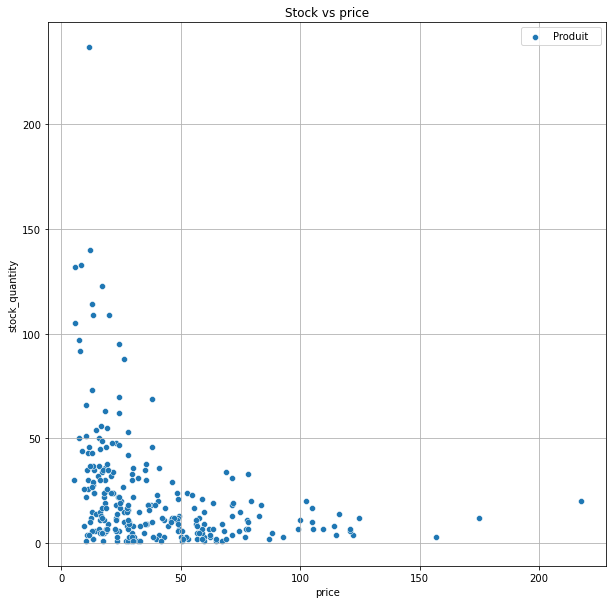

In [46]:
k=elw[ (elw['total_sales']==0.0) & (elw['stock_quantity']>0)]
plt.figure(figsize=(10,10))
sb.scatterplot(data=k, x='price', y='stock_quantity',label='Produit   ')
plt.title('Stock vs price')
plt.grid()
plt.show()



## STOCK=0 ET STOCK_STATUS=INSTOCK = 1

In [47]:
elw[(elw['stock_quantity']==0) & (elw['stock_status']=='instock')].sort_values('price')

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales
713,4954,1,25.0,0,instock,bon-cadeau-25-euros,taxable,2018-06-01 11:53:46,"<span style=""color: #a85253;""><strong>Parlons ...",Bon cadeau de 25€,10.0


## PRICES PRODUITS **

<AxesSubplot:>

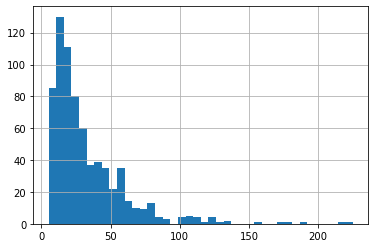

In [48]:
elw['price'].hist(bins=40) #DISTRIBUTION

In [49]:
elw['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

## TOP VENTES **

In [50]:
topventes=elw.sort_values('total_sales', ascending = False).head(5)

In [51]:
topventes

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales
32,4334,1,49.0,0,outofstock,7818,taxable,2018-03-01 13:02:44,La bulle fine et presente se dirige vers la su...,Champagne Gosset Grand Blanc de Blancs,96.0
16,4144,1,49.0,11,instock,1662,taxable,2018-02-13 12:17:25,"Le nez exprime sans détour la fraise, dans sa ...",Champagne Gosset Grand Rosé,87.0
680,4068,1,16.6,157,instock,16416,taxable,2018-02-12 12:42:28,"Avec ses arômes de cassis, de myrtille, de cer...",Gilles Robin Crozes-Hermitage Rouge Papillon 2019,62.0
663,4200,1,5.8,190,instock,16295,taxable,2018-02-15 13:05:06,"Rosé très agréable, intense, floral et minéral...",Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,46.0
634,4172,1,5.7,167,instock,16210,taxable,2018-02-14 15:54:33,Un très joli petit chardonnay qui nous révèle ...,Maurel Pays d'Oc Chardonnay 2019,43.0


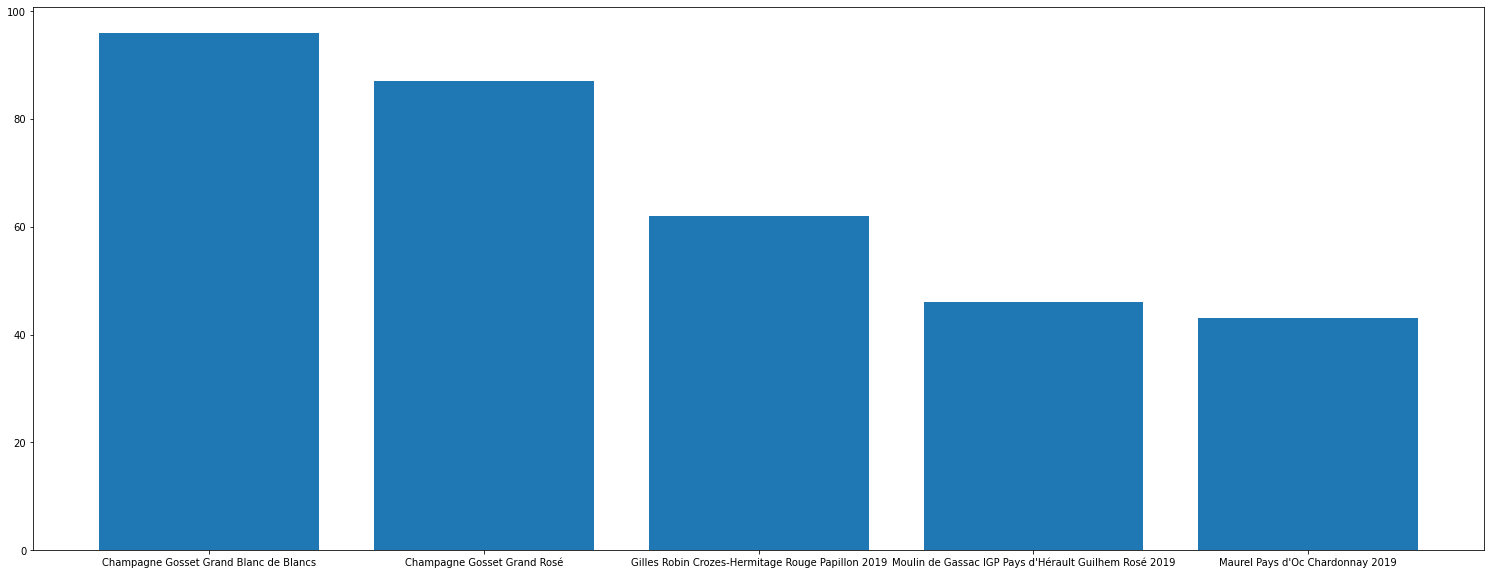

In [52]:
plt.figure(figsize=(26, 10))
plt.bar(height=topventes['total_sales'], x=topventes['post_title']) 
plt.show()



## (MOINS SALES) 1 SALES = 87 PRODUITS

In [53]:
moins_sales=elw[elw['total_sales']==1].sort_values('total_sales', ascending = True)

In [54]:
moins_sales

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales
15,4150,1,59.0,17,instock,1366,taxable,2018-02-13 12:45:31,"A l’œil, la robe brillante séduit par sa belle...",Champagne Mailly Grand Cru Intemporelle 2010,1.0
523,5522,1,48.4,10,instock,15861,taxable,2018-10-31 12:52:29,L'Angéline séduit par sa trame ronde et souple...,Domaine Chambeyron Côte Rôtie L'Angéline 2017,1.0
516,4646,1,21.5,34,instock,15848,taxable,2018-04-17 07:23:13,Le Clos Guillot est un vin raffiné. Ses arômes...,Bernard Baudry Chinon Rouge Le Clos Guillot 2017,1.0
515,6926,1,49.9,24,instock,15845,taxable,2020-04-25 10:43:23,"Velouté, profond, racé, beaucoup de sève. Très...",Château Jean Faure Saint-Emilion Grand Cru 2016,1.0
501,6632,1,52.7,2,instock,15794,taxable,2020-01-23 11:06:12,"<span title="""">Des fruits rouges des bois en b...",Weingut Besson-Strasser Zürich Pinot Noir Chlo...,1.0
...,...,...,...,...,...,...,...,...,...,...,...
218,5700,1,44.5,0,outofstock,14736,taxable,2019-01-31 10:58:26,Fruit d'une histoire et d'un héritage familial...,"Gilles Robin Crozes-Hermitage Rouge ""1920"" 2016",1.0
216,4241,1,8.9,7,instock,14725,taxable,2018-02-20 09:07:09,"Avec cette cuvée, Les Frères Parcé ont voulu r...",Parcé Frères IGP Côtes Catalanes Hommage à Fer...,1.0
186,4162,1,14.3,26,instock,14474,taxable,2018-02-14 13:53:20,"Ce vin présente un nez plein de fruits, avec d...",Domino Romano Ribera Del Duero Camino Romano 2016,1.0
297,5772,1,29.7,47,instock,15180,taxable,2019-03-13 14:08:45,<div>Ce vin provient de vignes situées dans de...,Camille Giroud Santenay Rouge 2016,1.0


## VENTES PAR POST DU PRODUIT

### VENTES DE 2018 = 2370 DIVISÉ EN 3 ANNEES= 790 EN 507 PRODUITS

In [55]:
elw['total_sales'][(elw['post_date_gmt']>='2018-01-01') & (elw['post_date_gmt']<'2019-01-01')].sum()/3

790.0

In [56]:
elw['total_sales'][(elw['post_date_gmt']>='2018-01-01') & (elw['post_date_gmt']<'2019-01-01')].count()

507

### VENTES 2019 = 458 DIVISÉ EN 2 ANNEES= 229 EN 164 PRODUITS

In [57]:
elw['total_sales'][(elw['post_date_gmt']>='2019-01-01') & (elw['post_date_gmt']<'2020-01-01')].sum()/2

229.0

In [58]:
elw['total_sales'][(elw['post_date_gmt']>='2019-01-01') & (elw['post_date_gmt']<'2020-01-01')].count()

164

### VENTES 2020 = 37 EN 43 PRODUITS

In [59]:
elw['total_sales'][(elw['post_date_gmt']>='2020-01-01') & (elw['post_date_gmt']<'2021-01-01')].sum()

37.0

In [60]:
elw['total_sales'][(elw['post_date_gmt']>='2020-01-01') & (elw['post_date_gmt']<'2021-01-01')].count()

43

# CHIFRES D'AFFAIRES **

## TOTAL SALES & CHIFFRES HISTOGRAM **

In [61]:
elw['Chiffre d\'affaires']=elw['price']*elw['total_sales']

<AxesSubplot:>

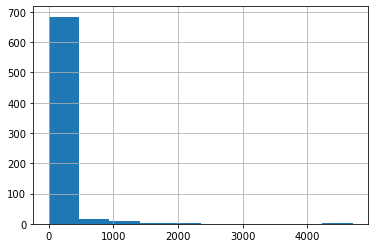

In [62]:
elw['Chiffre d\'affaires'].hist()

<AxesSubplot:>

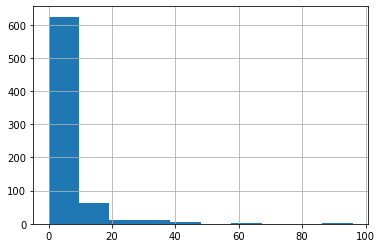

In [63]:
elw['total_sales'].hist()

## CHIFFRE D'AFFAIRES/DATE POST NUAGE P. **

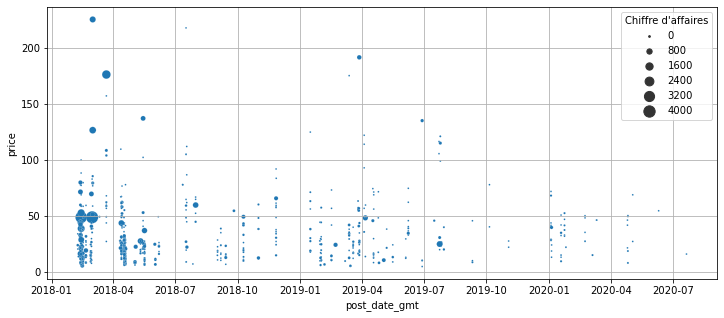

In [64]:
plt.figure(figsize=(12,5))
sb.scatterplot(data=elw, 
               x='post_date_gmt',
               y='price', 
               sizes=(3, 150),
               legend='brief',
           #    legend='auto',
               size='Chiffre d\'affaires')
plt.grid()
plt.show()

In [65]:
elw_col=elw.columns.tolist()

In [66]:
elw_col=['product_id',
'post_title',
 #'onsale_web',
 'price',
 'stock_quantity',
 #'stock_status',
 #'id_web',
 #'tax_status',
 #'post_date_gmt',
 #'post_excerpt',
 #'total_sales',
 'Chiffre d\'affaires',
 #'% Cifres afaires'
        ]

## TOP CHIFFRE D'AFFAIRES EN EUROS

In [67]:
elw[elw_col].sort_values('Chiffre d\'affaires', ascending = False).head(10)

,product_id,post_title,price,stock_quantity,Chiffre d'affaires
32,4334,Champagne Gosset Grand Blanc de Blancs,49.0,0,4704.0
16,4144,Champagne Gosset Grand Rosé,49.0,11,4263.0
24,4402,Cognac Frapin VIP XO,176.0,8,2288.0
55,4142,Champagne Gosset Grand Millésime 2006,53.0,8,1590.0
2,4141,Champagne Gosset Grande Réserve,39.0,1,1560.0
79,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,2,1391.5
548,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,0,1125.0
639,4153,Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,0,1044.0
703,6206,Domaine Giudicelli Patrimonio Blanc 2019,25.2,120,1033.2
680,4068,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,157,1029.2


In [68]:
chiffres_affaires=elw['Chiffre d\'affaires'].sum()

### CHIFFRE D'AFFAIRES TOTAL

In [69]:
chiffres_affaires

70568.6

In [70]:
elw['% Chiffre d\'affaires']=(elw['Chiffre d\'affaires']/chiffres_affaires*100).round(2)

In [71]:
elw_col=['product_id',
'post_title',
 #'onsale_web',
 'price',
 'stock_quantity',
 #'stock_status',
 #'id_web',
 #'tax_status',
 #'post_date_gmt',
 #'post_excerpt',
 #'total_sales',
 #'Chiffre d\'affaires',
 '% Chiffre d\'affaires']

## CHIFFRES D'AFFAIRES EN PROPORTION DU TOTAL **

In [72]:
elw[elw_col].sort_values('% Chiffre d\'affaires', ascending = False).head(10)

,product_id,post_title,price,stock_quantity,% Chiffre d'affaires
32,4334,Champagne Gosset Grand Blanc de Blancs,49.0,0,6.67
16,4144,Champagne Gosset Grand Rosé,49.0,11,6.04
24,4402,Cognac Frapin VIP XO,176.0,8,3.24
55,4142,Champagne Gosset Grand Millésime 2006,53.0,8,2.25
2,4141,Champagne Gosset Grande Réserve,39.0,1,2.21
79,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,2,1.97
548,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,0,1.59
639,4153,Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,0,1.48
703,6206,Domaine Giudicelli Patrimonio Blanc 2019,25.2,120,1.46
680,4068,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,157,1.46


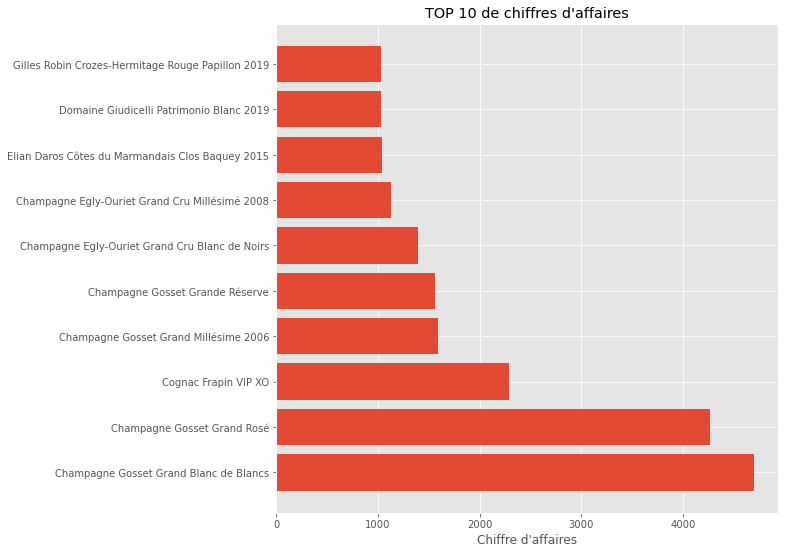

In [73]:
elw_g=elw.sort_values('% Chiffre d\'affaires', ascending = False).head(10)
plt.figure(figsize=(9, 9))
plt.style.use('ggplot')
plt.barh(elw_g['post_title'] ,elw_g['Chiffre d\'affaires'] ) 
plt.title('TOP 10 de chiffres d\'affaires')
plt.xlabel('Chiffre d\'affaires')
plt.show()


# ANALYSE DE VALEURS ABERRANTES **

## INTERVALLES INTERQUARTILES **

### PRICE **

In [74]:
q3, q1 = np.percentile (elw['price'], [75, 25])
iqr = q3 - q1
iqr

28.075000000000003

In [75]:
q3

42.175000000000004

In [76]:
q1

14.1

In [77]:
(q3-q1)/2

14.037500000000001

In [78]:
low=q1-(1.5*iqr)
high=q3+(1.5*iqr)

In [79]:
low

-28.012500000000003

In [80]:
high

84.28750000000001

### OUTLIERS INTERVALLES INTERQUARTILES **

In [81]:
elw[['price']][elw['price']>high].sort_values('price', ascending = False)

,price
548,225.0
198,217.5
258,191.3
24,176.0
300,175.0
33,157.0
168,137.0
246,135.0
79,126.5
245,124.8


In [82]:
elw['price'].mean()

32.493137254902

In [83]:
elw['price'].std() #equart type

27.810524922323708

In [84]:
elw['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'BOXPLOT PRICE')

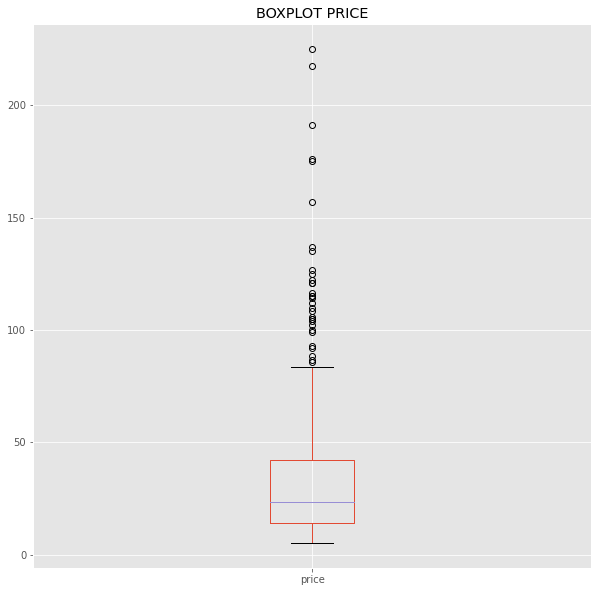

In [85]:
elw.boxplot('price',figsize=(10,10))
plt.title('BOXPLOT PRICE')


In [86]:
elw[ (elw['Chiffre d\'affaires'] >= q3) ]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales,Chiffre d'affaires,% Chiffre d'affaires
0,4729,1,8.6,151,instock,38,taxable,2018-04-18 10:25:58,"Ce Crémant est vif et délicat, gourmand et cro...",Emile Boeckel Crémant Brut Blanc de Blancs,38.0,326.8,0.46
2,4141,1,39.0,1,instock,304,taxable,2018-02-13 11:57:44,"Le nez, ouvert et expressif, évoque les fruits...",Champagne Gosset Grande Réserve,40.0,1560.0,2.21
4,5047,1,22.5,129,instock,531,taxable,2018-07-18 13:58:02,Cuvée bien équilibrée à la fois vive et souple...,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,13.0,292.5,0.41
6,4630,1,62.4,3,instock,793,taxable,2018-04-14 09:52:20,Les eaux de vie naissent d'une subtile alchimi...,Marcel Windholtz Eau de Vie de Coing,4.0,249.6,0.35
9,4633,1,52.4,2,instock,804,taxable,2018-04-14 09:59:32,Les eaux de vie naissent d'une subtile alchimi...,Marcel Windholtz Eau de Vie de Mirabelle d'Als...,3.0,157.2,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,6206,1,25.2,120,instock,16580,taxable,2019-07-24 07:31:48,Ce Patrimonio Blanc signé Muriel Giudicelli no...,Domaine Giudicelli Patrimonio Blanc 2019,41.0,1033.2,1.46
705,4965,1,7.1,203,instock,16586,taxable,2018-06-02 07:35:14,"<div id=""wrapper"">\n<div id=""container-wrapper...",Château Turcaud Entre-Deux-Mers 2019,26.0,184.6,0.26
706,4032,1,14.1,0,outofstock,19814,taxable,2018-02-09 13:01:05,Gamine représente tout le fruité et la gourman...,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,3.0,42.3,0.06
708,4054,1,71.6,0,outofstock,19816,taxable,2018-02-12 10:25:39,"Fleuron du domaine, élaboré uniquement lors de...",Clos du Mont-Olivet Châteauneuf-du-Pape Cuvée ...,10.0,716.0,1.01


In [87]:
 elw [(elw['Chiffre d\'affaires']<=q1)]

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales,Chiffre d'affaires,% Chiffre d'affaires
1,4634,1,41.0,4,instock,41,taxable,2018-04-14 10:01:43,Les eaux de vie naissent d'une subtile alchimi...,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,0.0,0.0,0.0
3,5932,1,59.9,3,instock,523,taxable,2019-04-06 13:25:58,Issus des meilleurs crus de Grande et de Petit...,Cognac Normandin Mercier VFC,0.0,0.0,0.0
5,4631,1,76.8,3,instock,791,taxable,2018-04-14 09:54:47,Les eaux de vie naissent d'une subtile alchimi...,Marcel Windholtz Eau de Vie de Baie de Houx,0.0,0.0,0.0
7,4635,1,62.4,3,instock,798,taxable,2018-04-14 10:05:09,Les eaux de vie naissent d'une subtile alchimi...,Marcel Windholtz Eau de Vie de Kirsch d'Alsace...,0.0,0.0,0.0
8,4628,1,39.6,2,instock,802,taxable,2018-04-14 09:48:19,Les eaux de vie naissent d'une subtile alchimi...,Marcel Windholtz Eau de Vie de Marc de Muscat,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,4039,1,46.0,0,outofstock,19815,taxable,2018-02-12 08:04:37,Le côte rôtie Carmina monte en puissance mais ...,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0,0.0,0.0
709,5561,1,58.0,0,outofstock,19820,taxable,2018-11-26 09:54:29,"<div id=""wrapper"">\n<div id=""container-wrapper...",Tempier Bandol Migoua 2017,0.0,0.0,0.0
710,5563,1,58.0,0,outofstock,19821,taxable,2018-11-26 09:56:30,"<div id=""wrapper"">\n<div id=""container-wrapper...",Tempier Bandol Tourtine 2017,0.0,0.0,0.0
711,5565,1,92.0,0,outofstock,19822,taxable,2018-11-26 09:59:10,"<div id=""wrapper"">\n<div id=""container-wrapper...",Tempier Bandol Cabassaou 2017,0.0,0.0,0.0


## NUAGE DE POINTS **

### CIFRES AFAIRES **

In [89]:
elw['Outlier / Inliers']=''
elw['Outlier / Inliers'][(elw['price']<=high) & (elw['price']>=low)]='Inlier'
elw['Outlier / Inliers'][ (elw['price']>high) | (elw['price']<low) ]='Outlier'

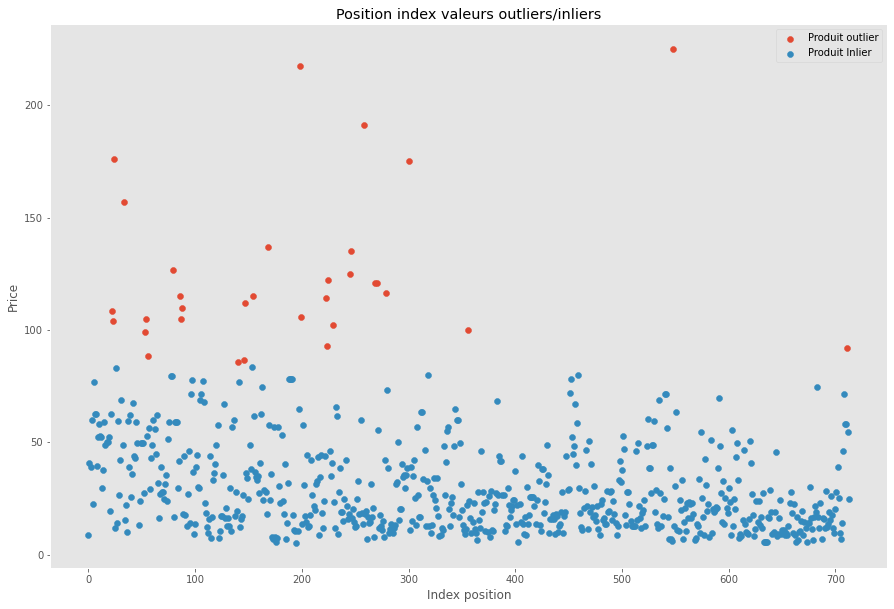

In [90]:
plt.figure(figsize=(15,10))
plt.scatter(elw[elw['Outlier / Inliers']=='Outlier' ].index, 
            elw['price'][elw['Outlier / Inliers']=='Outlier' ],
            label='Produit outlier')
plt.legend()
plt.xlabel('Index position')
plt.ylabel("Price")
plt.scatter(elw[elw['Outlier / Inliers']=='Inlier' ].index, 
            elw['price'][elw['Outlier / Inliers']=='Inlier' ],
            label='Produit Inlier')
plt.legend()
plt.title("Position index valeurs outliers/inliers")
plt.grid()
plt.show()
plt.close()



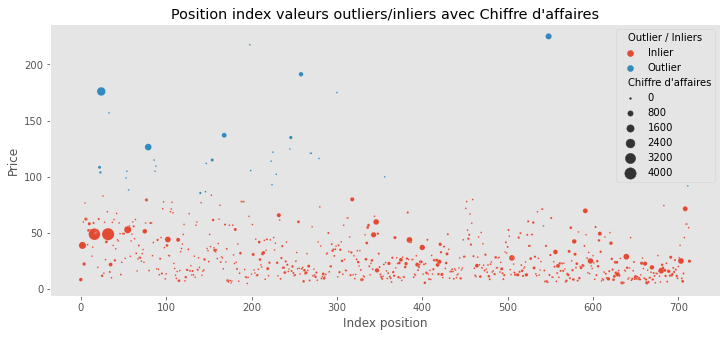

In [92]:
plt.figure(figsize=(12,5))
plt.title("Position index valeurs outliers/inliers avec Chiffre d'affaires")
sb.scatterplot(data=elw, x=elw.index , y='price', 
               sizes=(3, 150),
               legend='brief',
               hue='Outlier / Inliers',size='Chiffre d\'affaires')
plt.xlabel('Index position')
plt.ylabel("Price")
plt.grid()
plt.show()



## ZSCORE - PRICE **

In [93]:

numeric_cols = elw.select_dtypes(include=[np.number]).columns

elw_z=elw[numeric_cols].apply(zscore)

In [94]:
elw_z

,product_id,onsale_web,price,stock_quantity,total_sales,Chiffre d'affaires,% Chiffre d'affaires
0,-0.384271,NaN,-0.859742,2.548064,3.992779,0.741421,0.734513
1,-0.504530,NaN,0.306101,-0.515778,-0.471394,-0.321448,-0.321350
2,-1.128615,NaN,0.234135,-0.578305,4.227735,4.752225,4.751383
3,1.138597,NaN,0.986176,-0.536620,-0.471394,-0.321448,-0.321350
4,0.018283,NaN,-0.359581,2.089530,1.055823,0.629865,0.619746
...,...,...,...,...,...,...,...
709,0.668951,NaN,0.917809,-0.599148,-0.471394,-0.321448,-0.321350
710,0.671483,NaN,0.917809,-0.599148,-0.471394,-0.321448,-0.321350
711,0.674015,NaN,2.141225,-0.599148,-0.471394,-0.321448,-0.321350
712,2.803244,NaN,0.802664,-0.119771,-0.471394,-0.321448,-0.321350


In [95]:
elw_zscore=pd.merge(elw, elw_z, left_index=True, right_index=True)

In [96]:
zcolumns=elw_zscore.columns.tolist()

In [97]:
zcolumns=[
    'product_id_x',
 'onsale_web_x',
 'price_x',
 'stock_quantity_x',
 'stock_status',
 'id_web',
 'tax_status',
 'post_date_gmt',
 'post_excerpt',
 'post_title',
 'total_sales_x',
 'Chiffre d\'affaires_x',
 '% Chiffre d\'affaires_x',
# 'product_id_y',
 #'onsale_web_y',
 'price_y',
# 'stock_quantity_y',
# 'total_sales_y',
 'Chiffre d\'affaires_y',
 #'% Chiffre d\'affaires_y'
]

In [98]:
elw_zscore[zcolumns].sort_values('price_y', ascending = False).head(10)

,product_id_x,onsale_web_x,price_x,stock_quantity_x,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales_x,Chiffre d'affaires_x,% Chiffre d'affaires_x,price_y,Chiffre d'affaires_y
548,4352,1,225.0,0,outofstock,15940,taxable,2018-03-02 09:30:04,Issu d’un assemblage de 70% de Pinot Noir du g...,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,1125.0,1.59,6.926939,3.337451
198,5001,1,217.5,20,instock,14581,taxable,2018-07-17 07:45:39,Robe cerise chatoyante. Un nez de fruits rouge...,David Duband Charmes-Chambertin Grand Cru 2014,0.0,0.0,0.00,6.657068,-0.321448
258,5892,1,191.3,10,instock,14983,taxable,2019-03-28 09:21:36,Cet Ambonnay évoque les grands Pinots Noirs de...,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,3.0,573.9,0.81,5.714318,1.545078
24,4402,1,176.0,8,instock,3510,taxable,2018-03-22 10:21:05,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,Cognac Frapin VIP XO,13.0,2288.0,3.24,5.163781,7.119939
300,5767,1,175.0,12,instock,15185,taxable,2019-03-13 13:43:22,<div>Ce vin provient de vignes âgées de 50 ans...,Camille Giroud Clos de Vougeot 2016,0.0,0.0,0.00,5.127798,-0.321448
33,4406,1,157.0,3,instock,7819,taxable,2018-03-22 10:42:48,Eau-de-Vie distillée à partir de raisins de Gr...,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0,0.0,0.00,4.480108,-0.321448
168,4904,1,137.0,13,instock,14220,taxable,2018-05-15 08:23:41,"Ce Corton Charlemagne éblouit par son assise, ...",Domaine Des Croix Corton Charlemagne Grand Cru...,5.0,685.0,0.97,3.760451,1.906415
246,6126,1,135.0,10,instock,14923,taxable,2019-06-28 15:22:27,Une robe somptueuse a la teinte jaune pâle eti...,Champagne Gosset Célébris Vintage 2007,2.0,270.0,0.38,3.688486,0.556687
79,4355,1,126.5,2,instock,12589,taxable,2018-03-02 09:46:10,Le Blanc de Noirs représente le meilleur du sa...,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,11.0,1391.5,1.97,3.382632,4.204203
245,5612,1,124.8,12,instock,14915,taxable,2019-01-15 14:30:49,"Né sur un sol marno-gréseux, ce Furstentum est...",Domaine Weinbach Gewurztraminer Grand Cru Furs...,0.0,0.0,0.00,3.321461,-0.321448


In [99]:
elw_zscore[zcolumns][elw_zscore['price_y']>4]

,product_id_x,onsale_web_x,price_x,stock_quantity_x,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,total_sales_x,Chiffre d'affaires_x,% Chiffre d'affaires_x,price_y,Chiffre d'affaires_y
24,4402,1,176.0,8,instock,3510,taxable,2018-03-22 10:21:05,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,Cognac Frapin VIP XO,13.0,2288.0,3.24,5.163781,7.119939
33,4406,1,157.0,3,instock,7819,taxable,2018-03-22 10:42:48,Eau-de-Vie distillée à partir de raisins de Gr...,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0,0.0,0.00,4.480108,-0.321448
198,5001,1,217.5,20,instock,14581,taxable,2018-07-17 07:45:39,Robe cerise chatoyante. Un nez de fruits rouge...,David Duband Charmes-Chambertin Grand Cru 2014,0.0,0.0,0.00,6.657068,-0.321448
258,5892,1,191.3,10,instock,14983,taxable,2019-03-28 09:21:36,Cet Ambonnay évoque les grands Pinots Noirs de...,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,3.0,573.9,0.81,5.714318,1.545078
300,5767,1,175.0,12,instock,15185,taxable,2019-03-13 13:43:22,<div>Ce vin provient de vignes âgées de 50 ans...,Camille Giroud Clos de Vougeot 2016,0.0,0.0,0.00,5.127798,-0.321448
548,4352,1,225.0,0,outofstock,15940,taxable,2018-03-02 09:30:04,Issu d’un assemblage de 70% de Pinot Noir du g...,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,1125.0,1.59,6.926939,3.337451


In [100]:
elw_zscore['price_x'][elw_zscore['price_y']>4]

24     176.0
33     157.0
198    217.5
258    191.3
300    175.0
548    225.0
Name: price_x, dtype: float64

In [101]:
elw_zscore[zcolumns][elw_zscore['price_y']>3].count()

product_id_x              14
onsale_web_x              14
price_x                   14
stock_quantity_x          14
stock_status              14
id_web                    14
tax_status                14
post_date_gmt             14
post_excerpt              14
post_title                14
total_sales_x             14
Chiffre d'affaires_x      14
% Chiffre d'affaires_x    14
price_y                   14
Chiffre d'affaires_y      14
dtype: int64

### VALEURS ABERRANTES **

In [102]:
(elw_zscore[['price_x']][elw_zscore['price_y']>2]).sort_values('price_x', ascending = False)

,price_x
548,225.0
198,217.5
258,191.3
24,176.0
300,175.0
33,157.0
168,137.0
246,135.0
79,126.5
245,124.8


In [103]:
elw_zscore.describe(include='all')

,product_id_x,onsale_web_x,price_x,stock_quantity_x,stock_status,id_web,tax_status,post_date_gmt,post_excerpt,post_title,...,Chiffre d'affaires_x,% Chiffre d'affaires_x,Outlier / Inliers,product_id_y,onsale_web_y,price_y,stock_quantity_y,total_sales_y,Chiffre d'affaires_y,% Chiffre d'affaires_y
count,714.000000,714.0,714.000000,714.000000,714,714.0,714,714,714,714,...,714.000000,714.000000,714,7.140000e+02,0.0,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02,7.140000e+02
unique,NaN,NaN,NaN,NaN,2,714.0,1,714,677,711,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,instock,38.0,taxable,2018-04-18 10:25:58,Les eaux de vie naissent d'une subtile alchimi...,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,...,NaN,NaN,Inlier,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,574,1.0,714,1,12,2,...,NaN,NaN,682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 11:58:52,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-20 09:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5032.557423,1.0,32.493137,28.746499,NaN,NaN,NaN,NaN,NaN,NaN,...,98.835574,0.140000,NaN,3.475472e-16,NaN,1.908682e-16,2.534543e-16,1.388556e-16,-2.116265e-16,3.012685e-16
std,790.510878,0.0,27.810525,48.012608,NaN,NaN,NaN,NaN,NaN,NaN,...,307.685071,0.435968,NaN,1.000701e+00,NaN,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00,1.000701e+00
min,3847.000000,1.0,5.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,-1.500787e+00,NaN,-9.820840e-01,-5.991478e-01,-4.713937e-01,-3.214484e-01,-3.213495e-01
25%,4280.250000,1.0,14.100000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,-9.523396e-01,NaN,-6.618369e-01,-5.574629e-01,-4.713937e-01,-3.214484e-01,-3.213495e-01


In [104]:
elw_zscore['price_x'][elw_zscore['price_y']<0]

0       8.6
4      22.5
13     29.5
20     19.5
25     12.0
       ... 
703    25.2
704     9.7
705     7.1
706    14.1
713    25.0
Name: price_x, Length: 465, dtype: float64

In [105]:
elw_zscore['price_x'].std()

27.810524922323708

In [106]:
elw_zscore['price_x'].mean()

32.493137254902

### 1 ÉCART TYPE= 88,79% **

In [107]:
elw_zscore[(elw_zscore['price_x']>(32.493137-(27.810525)*1)) 
            & (elw_zscore['price_x']<(32.493137+(27.810525)*1))].count()

product_id_x              634
onsale_web_x              634
price_x                   634
stock_quantity_x          634
stock_status              634
id_web                    634
tax_status                634
post_date_gmt             634
post_excerpt              634
post_title                634
total_sales_x             634
Chiffre d'affaires_x      634
% Chiffre d'affaires_x    634
Outlier / Inliers         634
product_id_y              634
onsale_web_y                0
price_y                   634
stock_quantity_y          634
total_sales_y             634
Chiffre d'affaires_y      634
% Chiffre d'affaires_y    634
dtype: int64

### 2 ÉCART TYPE= 95,79% **

In [108]:
elw_zscore[(elw_zscore['price_x']>(32.493137-(27.810525)*2)) 
            & (elw_zscore['price_x']<(32.493137+(27.810525)*2))].count()

product_id_x              684
onsale_web_x              684
price_x                   684
stock_quantity_x          684
stock_status              684
id_web                    684
tax_status                684
post_date_gmt             684
post_excerpt              684
post_title                684
total_sales_x             684
Chiffre d'affaires_x      684
% Chiffre d'affaires_x    684
Outlier / Inliers         684
product_id_y              684
onsale_web_y                0
price_y                   684
stock_quantity_y          684
total_sales_y             684
Chiffre d'affaires_y      684
% Chiffre d'affaires_y    684
dtype: int64

### 3 ÉCART TYPE= 98,03% **

In [109]:
elw_zscore[(elw_zscore['price_x']>(32.493137-(27.810525)*3)) 
            & (elw_zscore['price_x']<(32.493137+(27.810525)*3))].count()

product_id_x              700
onsale_web_x              700
price_x                   700
stock_quantity_x          700
stock_status              700
id_web                    700
tax_status                700
post_date_gmt             700
post_excerpt              700
post_title                700
total_sales_x             700
Chiffre d'affaires_x      700
% Chiffre d'affaires_x    700
Outlier / Inliers         700
product_id_y              700
onsale_web_y                0
price_y                   700
stock_quantity_y          700
total_sales_y             700
Chiffre d'affaires_y      700
% Chiffre d'affaires_y    700
dtype: int64

In [110]:
elw_zscore.count()

product_id_x              714
onsale_web_x              714
price_x                   714
stock_quantity_x          714
stock_status              714
id_web                    714
tax_status                714
post_date_gmt             714
post_excerpt              714
post_title                714
total_sales_x             714
Chiffre d'affaires_x      714
% Chiffre d'affaires_x    714
Outlier / Inliers         714
product_id_y              714
onsale_web_y                0
price_y                   714
stock_quantity_y          714
total_sales_y             714
Chiffre d'affaires_y      714
% Chiffre d'affaires_y    714
dtype: int64